In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import tikzplotlib

%run './split_step_fourier.ipynb'
DEBUG = False

# showing figures inline
%matplotlib inline
# plotting options 
figure_size = (16, 9)
plt.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [2]:
# parameters
f_symbol = 32e9  # symbol rate (Baud) (Symbols per second)
n_up = 10  # samples per symbol (>1 => oversampling)

r_rc = .33
syms_per_filt = 4  # symbols per filter (plus minus in both directions)
t_sample_rc, rc = get_rc_ir(syms_per_filt, r_rc, f_symbol, n_up)

power = 5

# modulation scheme and constellation points
M = 2
modulation = {'0': -1, '1': 1}
n_symbol = 5 # number of symbols

# Signalfolge generieren
send_bits = ['0', '1', '1', '1', '0']

# Sendesignal generieren
send_rc = generate_signal(modulation, t_sample_rc, 1/f_symbol, send_bits, rc, syms_per_filt, n_symbol, power)

# add zeros before and after signal (use samples per symbol as factor)
send_new = add_zeros(send_rc, 10 * int(1/f_symbol/t_sample_rc))

In [3]:
# Transmission
z_length = 70  # [km]
nz = 10  # steps
dz = z_length / nz  # [km]

alpha = 0.0  # Dämpfung [dB/km]
D = 17  # [ps/nm/km]
beta2 = - (D * np.square(1550e-9)) / (2 * np.pi * 3e8) * 1e-3 # [s^2/km] propagation constant, lambda=1550nm is standard single-mode wavelength
gamma = 1.3 # [1/W/km]

output = splitstepfourier(send_new, t_sample_rc, dz, nz, alpha, beta2, gamma)

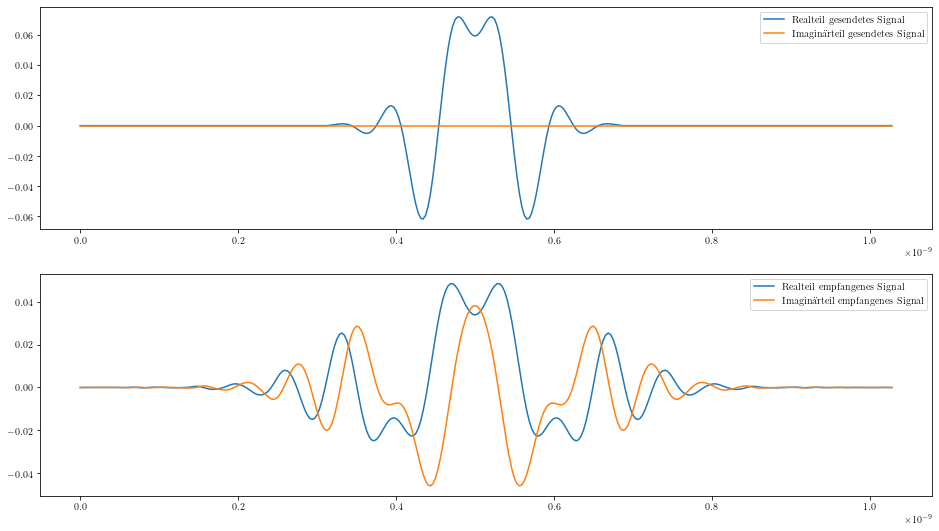

In [4]:
fig1, ax1 = plt.subplots(2, figsize=figure_size)
x_vals = np.arange(send_new.size)*t_sample_rc

ax1[0].plot(x_vals, np.real(send_new), label="Realteil gesendetes Signal")
ax1[1].plot(x_vals, np.real(output), label="Realteil empfangenes Signal")
ax1[0].plot(x_vals, np.imag(send_new), label="Imaginärteil gesendetes Signal")
ax1[1].plot(x_vals, np.imag(output), label="Imaginärteil empfangenes Signal")

ax1[0].legend()
ax1[1].legend()

In [5]:
output_fname = "transmit_real_imag"
output_path = "../../bachelorarbeit-ausarbeitung/figures/"

tikzplotlib.save(f'{output_path}{output_fname}.tex', figure=fig1, wrap=False, add_axis_environment=False, externalize_tables=True, override_externals=True)